<a href="https://colab.research.google.com/github/samiha-mahin/A-Machine-Learning-Models-Repo/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 🌟 What is LightGBM?

**LightGBM** is a **very fast and efficient version of Gradient Boosting** — just like **XGBoost**, but even **faster and more memory-efficient**, especially when your data is huge.

It’s called **"Light"** because:

* It uses **less memory**
* It trains **faster**
* It handles **big data** easily

---

## 🏡 Real-Life Example: Predicting House Prices (again)

Let’s say you're predicting house prices based on:

* Size (sq ft)
* Number of rooms
* Distance from city
* Age of the building
* Local crime rate

You want a model that trains fast but stays accurate. LightGBM is perfect for that!

---

## 🔍 How LightGBM Works (Simply):

### 🔁 Just like Gradient Boosting...

LightGBM also:

1. Starts with a simple model
2. Measures the error (residuals)
3. Builds small decision trees to correct the errors
4. Adds each new tree to improve the model step by step

BUT — it **does things differently and smarter** under the hood!

---

## 🚀 What Makes LightGBM Special?

### 1. **Leaf-wise Tree Growth (instead of level-wise)**

* Most algorithms grow trees **level by level** (like a top-down triangle).
* LightGBM grows **leaf by leaf** — it expands the **most important branch first**, making the model smarter faster.

👉 Result: Better accuracy in less time.

---

### 2. **Histogram-Based Learning**

* Instead of checking every possible split point, LightGBM **groups values into buckets** (histograms), which makes training much faster.

---

### 3. **Clever Memory Usage**

* It uses fewer resources, so it's **great for large datasets**.

---

## 🎯 Example in Action:

Imagine you have a **huge file** with **1 million houses** and their features.

You try 3 models:

* **Gradient Boosting** → Takes forever ⏳
* **XGBoost** → Faster but still needs tuning ⚙️
* **LightGBM** → Fast, accurate, and low memory use 🏎️

---

## 💡 Summary Table

| Feature                    | LightGBM Explanation (Simple)                  |
| -------------------------- | ---------------------------------------------- |
| ✅ Boosting Type            | Gradient Boosting (like XGBoost)               |
| 🚀 Tree Growth             | Leaf-wise (faster and smarter than level-wise) |
| 📊 Speed                   | Very fast, handles huge datasets               |
| 💾 Memory Usage            | Low (good for big data)                        |
| 🧠 Accuracy                | High, often better than others                 |
| ❌ Sensitive to Overfitting | Yes, so you must tune it a bit carefully       |
| 🔍 Missing Values          | Handled automatically                          |

---

## ✅ When to Use LightGBM

* You have **large datasets**
* You want **fast training**
* You need **high accuracy**
* Your features are mostly **numeric/tabular**

---

## 🔁 Difference from XGBoost (Easy View)

| Feature        | XGBoost    | LightGBM                       |
| -------------- | ---------- | ------------------------------ |
| Speed          | Fast       | **Faster**                     |
| Tree Growth    | Level-wise | **Leaf-wise (more efficient)** |
| Memory         | Moderate   | **Less memory used**           |
| Large Datasets | Good       | **Excellent**                  |


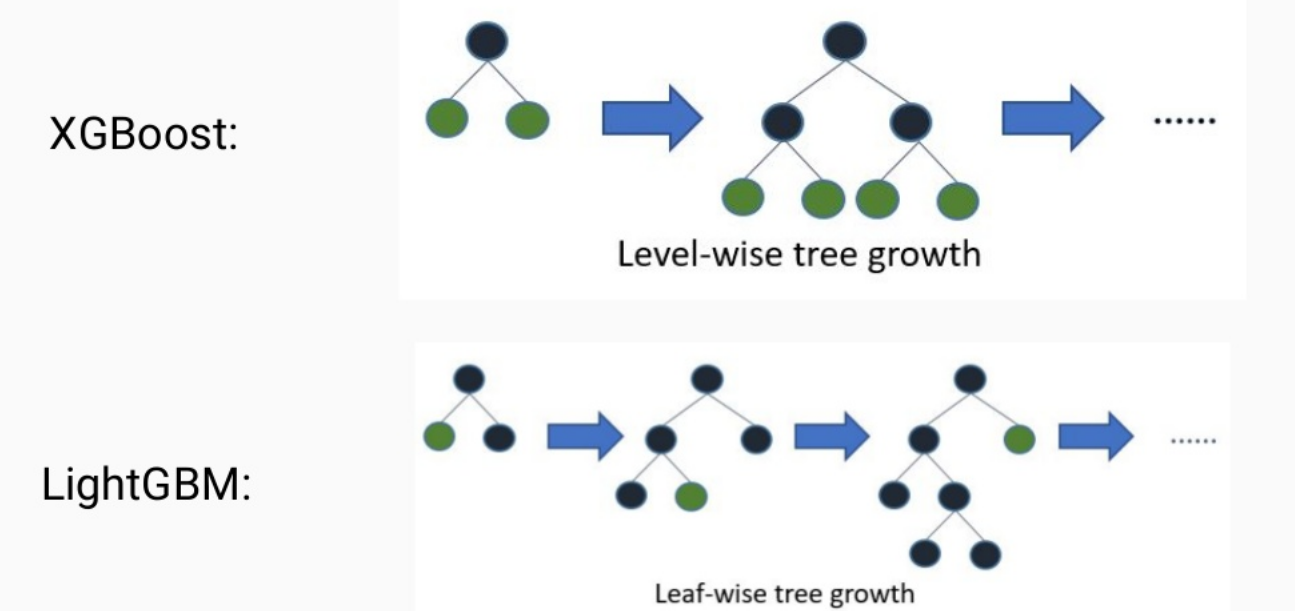

# **1. Titanic — LightGBM Classifier**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

In [6]:
num_transformer = SimpleImputer(strategy='mean')
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [7]:
clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

In [8]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Accuracy on Titanic: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#**2. California Housing — LightGBM Regressor**

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


LGBMRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"LightGBM MSE on California Housing: {mse:.3f}")
print(f"LightGBM R2 Score: {r2:.2f}")

LightGBM MSE on California Housing: 0.215
LightGBM R2 Score: 0.84


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
